# Módulo 9 - Regressão Polimonial



In [1]:
# EAD
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Model Trainning
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore, shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

# Deploy Modul
import joblib

### 1. AED



#### Carga de Dados



Nesta aula, vamos analisar um arquivo CSV que contém informações sobre salários de funcionários de uma empresa. O arquivo possui três colunas: tempo na empresa, nível na empresa e salário em reais. Vamos importar as bibliotecas necessárias e inspecionar a estrutura do DataFrame. Observamos que o arquivo possui mil entradas, representando mil funcionários. Não há valores ausentes e os tipos de dados foram corretamente capturados. O tempo na empresa é dado em meses e o nível na empresa varia de 1 a 10. Vamos fazer cópias do DataFrame para realizar a análise exploratória e o bucketing, que é uma análise baseada em agrupamentos numéricos. No próximo vídeo, começaremos o projeto prático de regressão polinomial.



In [2]:
# carregar dataset
df_salarios = pd.read_csv("../datasets/dataset_salario.csv")
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [3]:
# copiar DF para DF_EDA + DF_Bucketing
df_salarios_eda = df_salarios.copy()
df_salarios_bucketing = df_salarios.copy()

#### Medidas Estatísticas e Análise Gráfica BoxPlot



Neste vídeo, começamos a análise exploratória dos dados. Primeiro, verificamos se há valores ausentes no nosso dataframe e constatamos que não há. Em seguida, extraímos as medidas estatísticas do dataframe para avaliar a estrutura dos dados. Observamos que a variável "tempo na empresa" varia de 1 a 120 meses, a variável "nível na empresa" varia de 1 a 10 e a variável "salário em reais" varia de R$ 538,56 a R$ 18.000. Notamos que a média do salário é de R$ 5.000, mas a mediana é de R$ 3.237, indicando uma possível distribuição não normal. Em seguida, verificamos a presença de outliers por meio de boxplots e identificamos alguns outliers na variável "salário em reais". No entanto, decidimos não removê-los, pois foram considerados corretos pelo especialista do negócio. Este foi apenas um primeiro olhar nos dados e continuaremos a análise no próximo vídeo.



In [4]:
# listar primieiras linhas do DataFrame
df_salarios_eda.head(7)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35


In [5]:
# detectar valores ausentes - não há
df_salarios_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

In [6]:
# resumo de medidas estatísticas
df_salarios_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


<Axes: xlabel='tempo_na_empresa'>

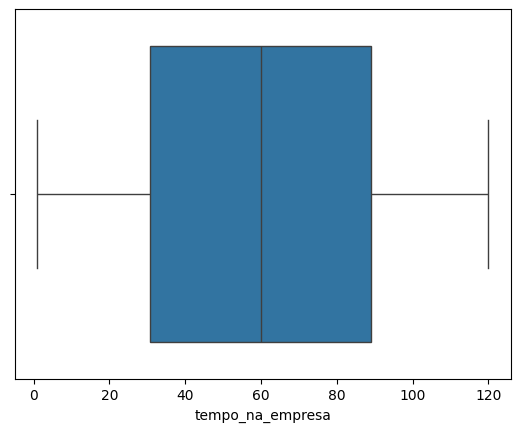

In [7]:
# verificar / detectar outliers - tempo na empresa
sns.boxplot(data=df_salarios_eda, x="tempo_na_empresa")

<Axes: xlabel='nivel_na_empresa'>

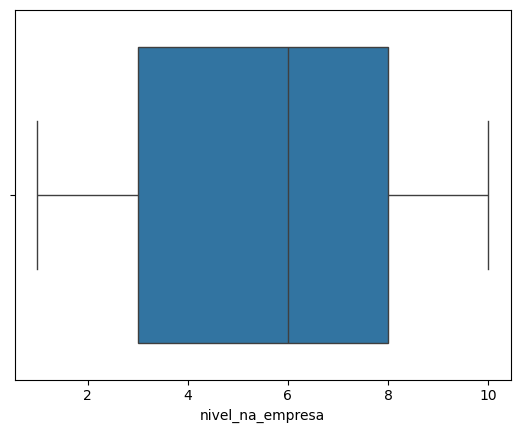

In [8]:
# verificar / detectar outliers - nível na empresa
sns.boxplot(data=df_salarios_eda, x="nivel_na_empresa")

<Axes: xlabel='salario_em_reais'>

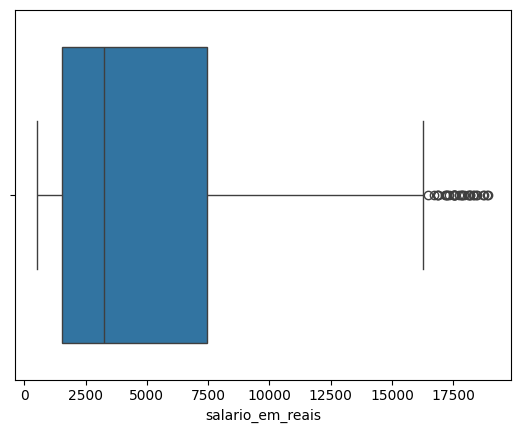

In [9]:
# verificar / detectar outliers - salário
sns.boxplot(data=df_salarios_eda, x="salario_em_reais")

#### Análise Gráfica Scatterplot e Histogramas



Nesta aula, continuamos nossa análise exploratória de dados, focando no cruzamento das variáveis numéricas com o tempo na empresa. Utilizamos o gráfico de scatter plot para identificar padrões entre essas variáveis. Observamos que a relação entre tempo na empresa e salário em reais não é linear, mas sim curva. Para lidar com essa situação, introduzimos o modelo de regressão polinomial. Também cruzamos a variável nível na empresa, que é quase categórica, e notamos que não há um padrão definido. Além disso, fizemos o cruzamento entre nível na empresa e tempo na empresa, e novamente não encontramos um padrão claro. Por fim, utilizamos o diagrama de per-plot para visualizar os histogramas das variáveis e concluímos que há uma relação forte entre tempo na empresa e salário em reais, mas não linear. Não encontramos correlações visíveis entre as variáveis. No próximo vídeo, veremos a correlação entre elas.



<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

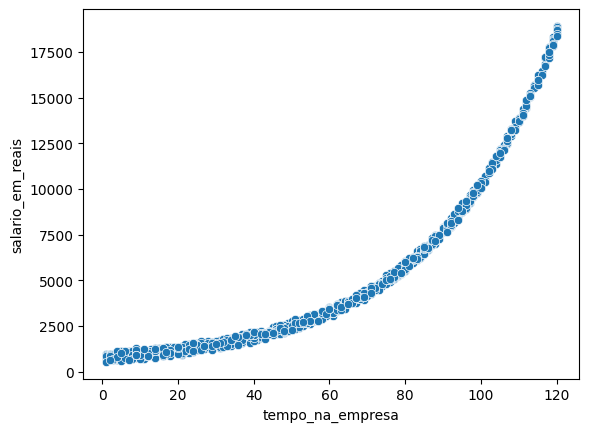

In [10]:
# cruzar variáveis numéricas com salário em reais (variável depensente)
sns.scatterplot(data=df_salarios_eda,
                x="tempo_na_empresa", y="salario_em_reais")

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

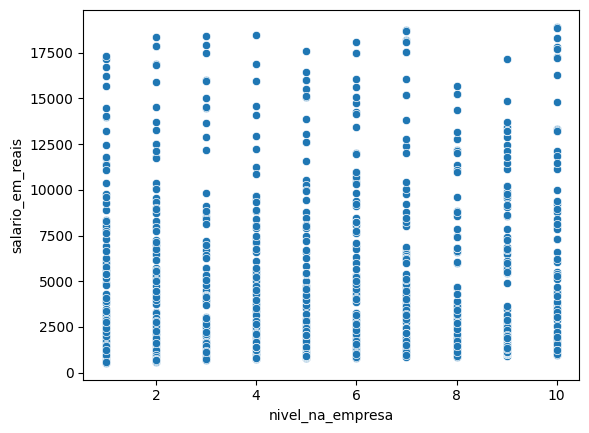

In [11]:
# cruzar variáveis numéricas com salário em reais (variável depensente)
sns.scatterplot(data=df_salarios_eda,
                x="nivel_na_empresa", y="salario_em_reais")

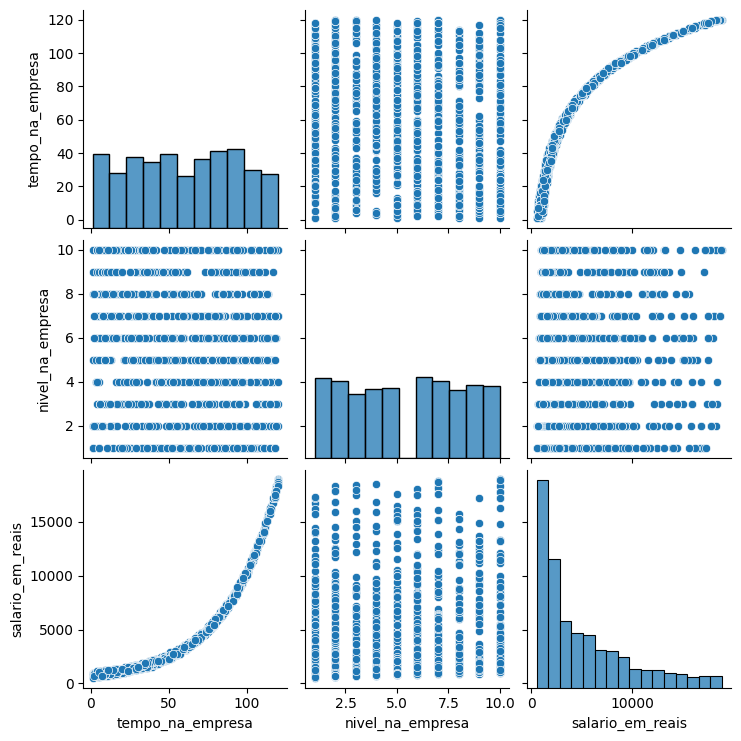

In [12]:
# histograma das variáveis
sns.pairplot(df_salarios_eda)

#### Análise de Correlação



Neste vídeo, vamos criar um diagrama de correlação usando um mapa de calor. Usaremos o método `heatmap` e o valor padrão de correlação de Pearson. Observamos que a correlação entre o nível da empresa e o tempo da empresa é fraca, assim como a correlação entre o nível da empresa e o salário em reais. No entanto, a correlação entre o tempo da empresa e o salário em reais é de 0.91, indicando uma correlação forte. Em seguida, exploramos a correlação de Spearman, que captura correlações não lineares. Ao usar Spearman, a correlação entre o tempo da empresa e o salário em reais aumenta para 1, indicando uma correlação quase perfeita e positiva. Isso sugere que essas variáveis podem estar relacionadas de forma não linear. Também criamos um gráfico de formato de ranking, que mostra a ordem das correlações de forma descendente. Observamos que o nível da empresa tem uma correlação muito baixa com o salário em reais, enquanto o tempo da empresa tem uma contribuição significativa.



<Axes: >

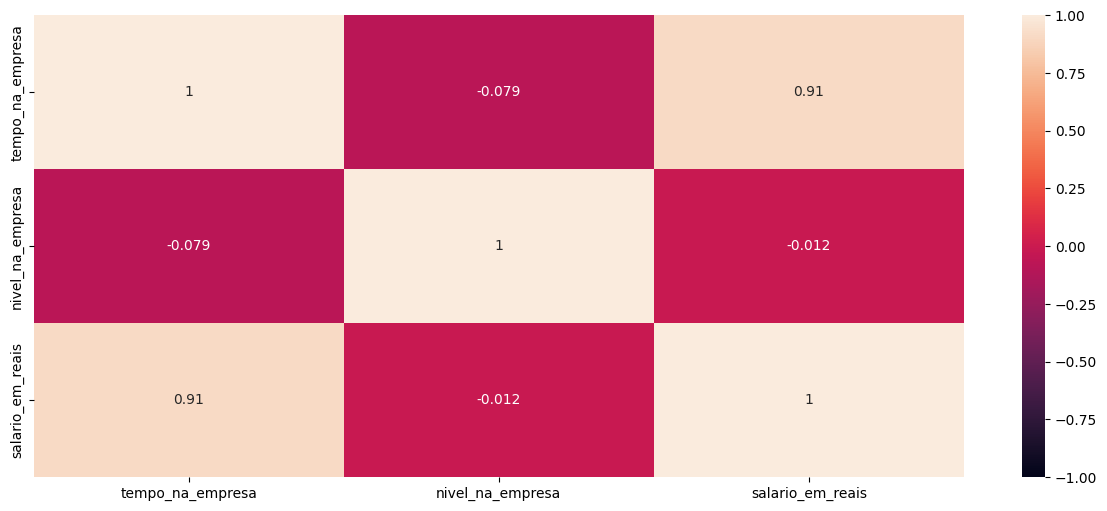

In [13]:
# exibir mapa de calor
plt.figure(figsize=(15, 6))
sns.heatmap(df_salarios_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

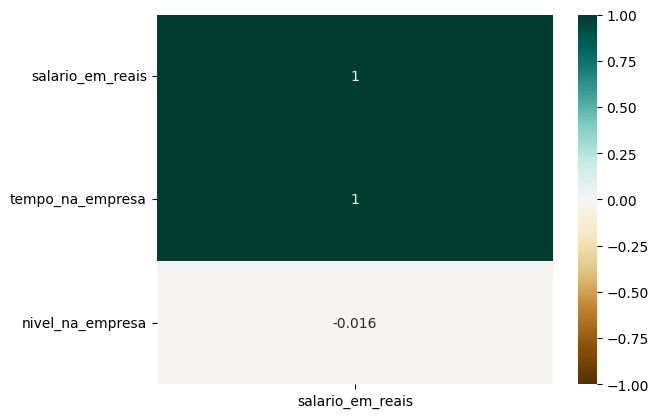

In [14]:
sns.heatmap(
    df_salarios_eda.corr("spearman")[["salario_em_reais"]].sort_values(
        by="salario_em_reais", ascending=False
    ),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
)

#### Análise Gráfica - Bucketing



Neste vídeo, concluímos nossa análise exploratória de dados utilizando o método de bucketing. Utilizamos a variável "tempo de casa" para agrupar os dados em faixas, já que essa variável possui uma ampla gama de valores. Criamos os buckets com intervalos de 10 em 10 anos, de 0 a 120. Em seguida, utilizamos a função cut do pandas para cortar os dados de acordo com esses buckets. Em seguida, plotamos um boxplot para analisar a relação entre o tempo de casa e o salário. Observamos que, assim como no gráfico de dispersão, há uma tendência de aumento do salário conforme o tempo de casa aumenta, mas não segue uma relação linear. Concluímos a análise exploratória e nos próximos vídeos começaremos a trabalhar no treinamento e validação do modelo.



In [15]:
# bucketingt tempo de casa
bins_tempo_casa = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels_tempo_casa = [
    "0-9",
    "10-19",
    "20-29",
    "30-39",
    "40-49",
    "50-59",
    "60-69",
    "70-79",
    "80-89",
    "90-99",
    "100-109",
    "110-119",
    "120-129",
]
df_salarios_bucketing["escala_tempo"] = pd.cut(
    df_salarios_bucketing["tempo_na_empresa"],
    bins=bins_tempo_casa,
    labels=labels_tempo_casa,
    include_lowest=True,
)
df_salarios_bucketing.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-49
1,49,4,2389.84,40-49
2,39,10,2158.73,30-39
3,51,1,2341.06,50-59
4,62,7,3584.20,60-69
5,105,10,12102.18,100-109
6,80,3,5723.35,70-79
7,85,2,6424.92,80-89
8,66,5,3916.18,60-69
9,73,5,4751.79,70-79


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

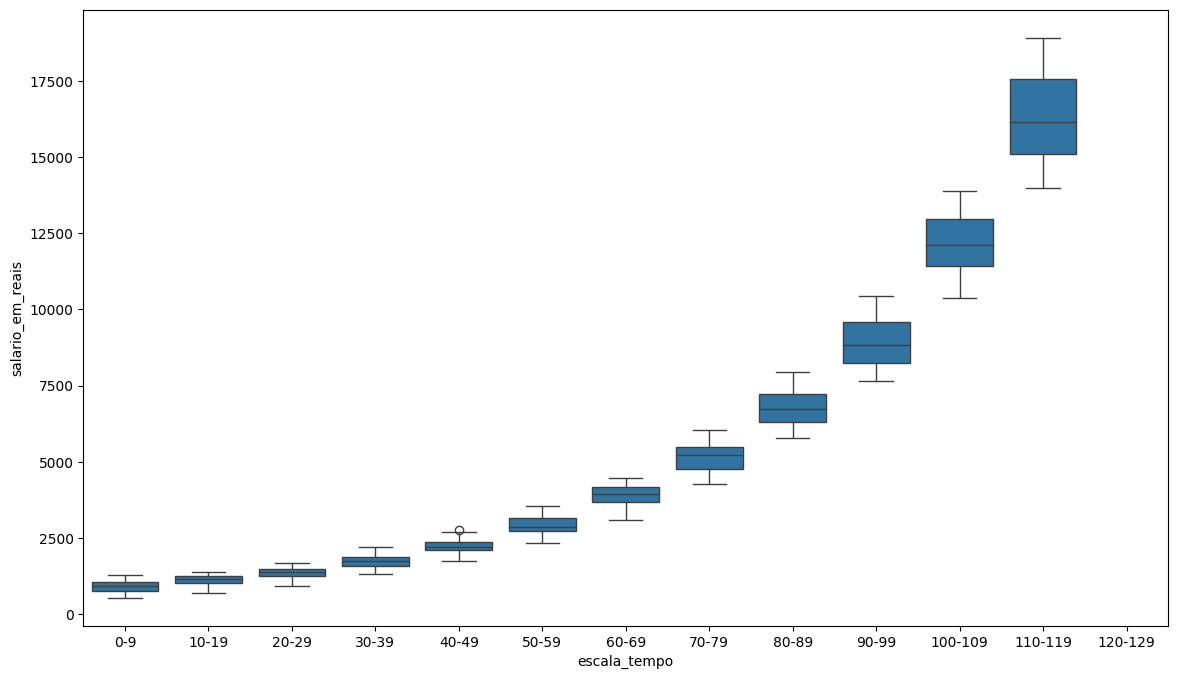

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(df_salarios_bucketing, x="escala_tempo", y="salario_em_reais")

### 2. Treinamento do Modelo - Regressão Linear



#### Divisão dos Dados com KFold (Para Validação Cruzada)



Nesta aula, vamos aprender sobre a divisão dos dados para treinamento de um modelo linear. Em vez de usar a abordagem tradicional de dividir os dados em treino e teste, vamos utilizar a validação cruzada. Vamos dividir os dados em 5 partes e treinar o modelo 5 vezes, usando uma parte como teste e as outras 4 como treino. Isso nos permitirá coletar métricas e monitorar o overfitting. Vamos importar as bibliotecas necessárias e criar o conjunto de treino e teste usando o KFold com 5 splits.



In [17]:
# criar dataset de treino e de teste
X = df_salarios.drop(columns="salario_em_reais")
y = df_salarios["salario_em_reais"]

In [18]:
# split usando KFold com 5 pastas / splits
kf = KFold(n_splits=5, shuffle=True, random_state=51)
kf

KFold(n_splits=5, random_state=51, shuffle=True)

#### Estrutura do Pipeline - Modelo de Regressão Linear



Nesta aula, vamos aprender a usar o Column Transformer para realizar transformações em colunas específicas de um conjunto de dados. Vamos criar um Column Transformer para aplicar uma transformação em colunas numéricas, utilizando o StandardScaler. Em seguida, vamos criar um Pipeline principal, que irá envolver o pré-processamento e o treinamento do modelo de regressão linear. Vamos utilizar o Column Transformer como pré-processador e o Linear Regression como modelo. Após isso, vamos partir para a parte de treinamento interativo, onde faremos ações em cima das K-folds. No próximo vídeo, continuaremos com o treinamento do modelo, utilizando um pipeline com a padronização das variáveis numéricas.



In [19]:
# Bloco para treinamento de modelo

# nomes da coluna
colunas_numericas = ["tempo_na_empresa", "nivel_na_empresa"]

# transformer para colunas numéricas
transformer_numericas = Pipeline(steps=[("scaler", StandardScaler())])

# criar uma ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[("num", transformer_numericas, colunas_numericas)]
)

# criar Pipeline principal = Pré-processamento + Treinamento
model_regr = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)
model_regr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tempo_na_empresa',
                                                   'nivel_na_empresa'])])),
                ('regressor', LinearRegression())])

#### Explicação sobre KFold e For Loop



Neste bloco da aula, vamos começar a treinar o modelo de forma iterativa, usando as divisões feitas anteriormente. Vamos armazenar as métricas de treino e teste em uma lista para calcular a média no final. Para verificar se o modelo está sofrendo de overfitting, vamos comparar o erro no treino e no teste. Se o erro no teste for muito maior, indica que o modelo não está generalizando bem. Vamos armazenar essas métricas em uma lista e também as predições para análise dos resíduos. Faremos iterações usando o objeto KFolds para dividir os dados em treino e teste.



#### Construção do Loop de Treinamento - Regressão Linear



Nesta aula, discutimos sobre overfitting e como calcular métricas de avaliação do modelo. O overfitting ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar para dados não vistos durante o treinamento. Calculamos o RMSE (Root Mean Squared Error) para os conjuntos de treinamento e teste, além do R2score. Também calculamos os resíduos, que são as diferenças entre os valores reais e as previsões do modelo. Armazenamos essas métricas em variáveis para análises futuras. No próximo vídeo, veremos como tirar a média dessas métricas e concluiremos esta parte do treinamento.



In [20]:
# armazenar RMSE treino e teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# armazenar R2 Score de teste
r2score_fold_test = []

# armazenar resíduos
residuos = []

# armazenar predições
y_pred_total = []

# iloc - seleciona dados utilizando índices inteiros baseados na posição
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # treinar o modelo no conjunto de treinamento
    model_regr.fit(X_train, y_train)

    # fazer predições nos conjuntos de treinamento e teste
    y_train_pred = model_regr.predict(X_train)
    y_test_pred = model_regr.predict(X_test)

    # Calcular o RMSE para os conjunstos de treinamento e teste
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # Calcular o R2score e Residuos para conjunto de teste
    r2score_test = r2_score(y_test, y_test_pred)
    residuos_test = np.array(y_test - y_test_pred)

    # Armazenamando as métricas da iteração na lista
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    r2score_fold_test.append(r2score_test)
    residuos.append(residuos_test)
    y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_test_final = np.mean(r2score_fold_test)
percentual_rmse_final = (
    (rmse_test_final - rmse_train_final) / rmse_train_final) * 100

# transformar em lista unidimensional
residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### 3. Validação do Modelo - Regressão Linear



#### Análise de Métricas - Regressão Linear



Nesta aula, aprendemos a armazenar os resíduos em uma lista e transformá-la em uma lista unidimensional usando o conceito de reshape. Também transformamos a lista de listas `y_pred_total` em uma lista unidimensional. Em seguida, executamos o código e analisamos as métricas do modelo linear, como RMSE e R2 score. Observamos que o RMSE de treinamento foi de R$1.862,00, o RMSE de teste foi de R$1.886,00 e a diferença percentual entre eles foi de 0.2%. O R2 score de teste foi de 0.82, indicando um bom ajuste do modelo. Não parece haver um problema de overfitting, pois a diferença entre treinamento e teste é pequena. No próximo vídeo, iremos analisar os resíduos.



In [21]:
# Métricas
print(f'RMSE Treino: R${rmse_train_final:.2f}')
print(f'RMSE Teste: R${rmse_train_final:.2f}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final:.4f}%')
print(f'R2Score Teste: {r2score_test_final:.4f}%')

# ausencia de overfitting

RMSE Treino: R$1882.83
RMSE Teste: R$1882.83
% Dif. RMSE Treino e Teste: 0.1922%
R2Score Teste: 0.8261%


#### Análise Gráfica de Resíduos - Regressão Linear



Nesta aula, vamos realizar a análise de resíduos do nosso modelo linear. Primeiro, vamos transformar os resíduos na escala padrão usando o pacote SciPy. Em seguida, vamos verificar a linearidade dos resíduos, que devem estar entre -2 e 2 na escala padrão. Também vamos verificar graficamente a homoscedasticidade, ou seja, se os valores estão em torno de uma reta. Se os resíduos não seguirem esses padrões, indica que não há linearidade e homoscedasticidade. Em seguida, vamos verificar se os resíduos seguem uma distribuição normal, usando o gráfico QQPlot. Se os valores não estiverem alinhados com a reta vermelha e a reta de 45 graus, indica que os resíduos não seguem uma distribuição normal. Essa análise gráfica é um indicador inicial da qualidade do nosso modelo. No próximo vídeo, vamos explorar testes estatísticos para validar essas observações.



In [22]:
# transformar residuos em escala padrão
# (X - media) / desvio-padrão
residuos_std = zscore(residuos)
residuos_std

array([ 5.95616525e-01, -7.24916727e-01, -6.46846433e-01,  8.64095533e-01,
       -5.33806156e-02, -7.61704833e-01,  6.80947606e-01,  1.45661295e+00,
        3.15407488e-01, -5.85616590e-01,  1.29483240e-01,  8.62850152e-01,
       -8.81408422e-01, -2.57676835e-01, -3.98447700e-01,  4.84215194e-01,
       -9.30147928e-01, -1.98427398e-01,  2.09007896e-01, -9.04965560e-01,
       -6.81287606e-02, -8.34446292e-01, -3.95656924e-01,  1.85180868e-01,
       -8.59767063e-01, -1.16014546e+00, -9.89137623e-01,  1.98282340e+00,
       -7.09136535e-01, -5.86755306e-01,  2.97904569e+00,  3.41834809e-01,
       -1.07716414e+00,  1.30248304e+00, -5.99662310e-01, -4.35883427e-01,
       -5.78726106e-01, -1.02611646e+00,  3.62850210e-01,  1.01353539e+00,
       -3.51902591e-01,  9.50243614e-01,  1.10020428e+00,  3.93453210e-01,
       -8.28856918e-02, -2.86114598e-01, -1.14814701e+00, -7.64435745e-01,
       -2.96268121e-01, -9.37004031e-01, -5.80106334e-01,  4.60575328e-02,
       -2.64983022e-01,  

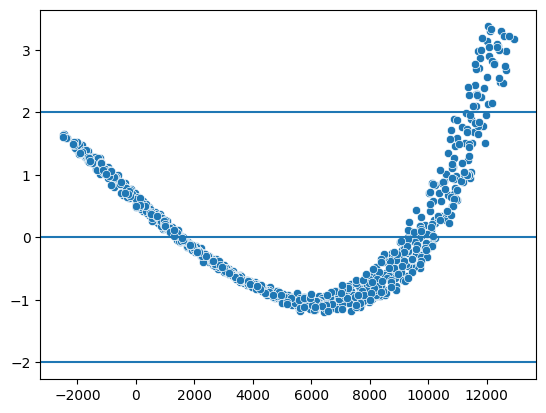

In [23]:
# verificar linearidade dos resíduos: valores entre -2 e +2 (escala padrão)
# verificar homocedasticidade: valores em torno da resta sem nenhuma tendência ou formato
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

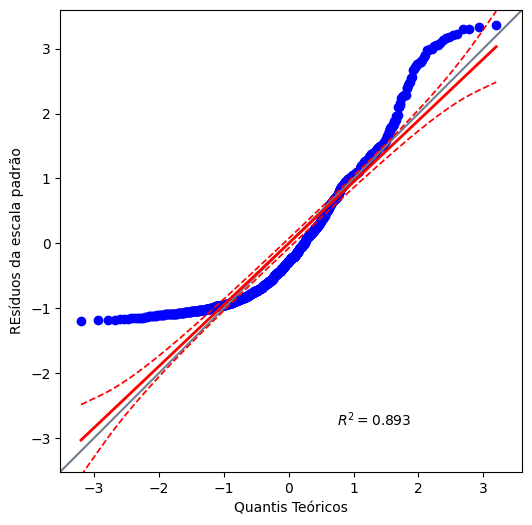

In [24]:
# checar se resíduos seguem um distribuição normal
# ## QQplot
plt.figure(figsize=(12,6))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("REsíduos da escala padrão")
plt.show()

#### Teste de Normalidade de Resíduos - Regressão Linear



Nesta aula, continuamos nossa análise de resíduos e começamos a trabalhar com testes estatísticos para validar se os resíduos seguem uma distribuição normal. Utilizamos os testes de normalidade Shapiro-Wilk, Kolmogorov-Smirnov e Lilliefors. Observamos que os resíduos não seguem uma distribuição normal, o que indica que o modelo de regressão linear utilizado pode não ser adequado para os dados. Portanto, é interessante considerar a utilização de modelos mais robustos e complexos. No próximo vídeo, iremos explorar a possibilidade de utilizar um modelo polinomial.



In [25]:
stat_shapiro, p_value_shapiro = shapiro(residuos)
print (f'Estat: teste = {stat_shapiro:.4f} e P-Value = {p_value_shapiro}')

Estat: teste = 0.8920 e P-Value = 7.015059614730555e-26


In [26]:
# Teste de normalidade
stats_ks, p_value_ks = kstest(residuos, "norm")
print(f"Estat: Teste = {stats_ks:.4f} e P-Value = {p_value_ks}")

Estat: Teste = 0.5940 e P-Value = 0.0


In [27]:
# Teste de Normalidade _ Lillefors
stat_ll, p_value_ll = lilliefors(residuos, dist="norm", pvalmethod="table")
print(f"Estat: Teste = {stat_ll:.4f} e P-Value = {p_value_ll}")

Estat: Teste = 0.1183 e P-Value = 0.0009999999999998899


### 4. Treinamento do Modelo - Regressão Polinomial



#### Features Polinomiais



Nesta aula, aprendemos sobre a criação de features polinomiais para treinar um modelo de regressão linear. Mostramos como utilizar a classe `PolynomialFeatures` do scikit-learn para gerar novas features com base nas features originais. Explicamos que o parâmetro `degree` define o grau do polinômio desejado e o parâmetro `include_bias` indica se uma feature constante deve ser incluída. Também demonstramos como obter os nomes das features geradas usando os métodos `fit_transform` da classe `PolynomialFeatures`. No próximo vídeo, iremos adaptar esse processo para treinar o modelo polinomial.



In [28]:
# exemplo de Criação de Features Polinomiais
feat_poly = PolynomialFeatures(degree=3,include_bias=True)
X_poly = feat_poly.fit_transform(X)
feat_poly.get_feature_names_out()

array(['1', 'tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

#### Treinamento do Modelo Polinomial



Nesta aula, aprendemos sobre a criação de features polinomiais e como treinar um modelo polinomial usando validação cruzada. Primeiro, discutimos a importância de avaliar o overfitting ao treinar modelos polinomiais com diferentes graus de polinômio. Em seguida, adaptamos nosso código anterior para treinar o modelo polinomial em vários graus. Criamos uma lista de graus de polinômio de 1 a 10 e iteramos sobre ela. Para cada grau, realizamos o processo de treinamento usando validação cruzada. Armazenamos os valores de RMSE, R2 Score e percentual de erro para cada grau de polinômio. No final, comparamos os resultados para determinar o grau de polinômio que obteve o melhor desempenho



In [29]:
# Bloco para treinamento de modelo

# graus
graus_polynomial = [4]

# criar listas vazia
rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

# split usando KFold com 5 pastas / splits
kf_poly = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:

    # Pipeline
    # transformer para colunas numéricas
    transformer_numericas = Pipeline(steps=[("scaler", StandardScaler())])

    # criar uma ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[("num", transformer_numericas, colunas_numericas)]
    )
    
    # criar feature polinomias
    
    poly_feat = PolynomialFeatures(degree=grau, include_bias=False)

    # criar Pipeline principal = Pré-processamento + Treinamento
    model_poly = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("poly_features", poly_feat),
               ("regressor", LinearRegression())]
    )

    # armazenar RMSE treino e teste
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # armazenar R2 Score de teste
    r2score_fold_test = []

    # armazenar resíduos
    residuos = []

    # armazenar predições
    y_pred_total = []

    # iloc - seleciona dados utilizando índices inteiros baseados na posição
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # treinar o modelo no conjunto de treinamento
        model_poly.fit(X_train, y_train)

        # fazer predições nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)

        # Calcular o RMSE para os conjunstos de treinamento e teste
        rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
        rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

        # Calcular o R2score e Residuos para conjunto de teste
        r2score_test = r2_score(y_test, y_test_pred)
        residuos_test = np.array(y_test - y_test_pred)

        # Armazenamando as métricas da iteração na lista
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        r2score_fold_test.append(r2score_test)
        residuos.append(residuos_test)
        y_pred_total.append(y_test_pred)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_test_final = np.mean(r2score_fold_test)
    percentual_rmse_final = (
        (rmse_test_final - rmse_train_final) / rmse_train_final) * 100

    # transformar em lista unidimensional
    residuos = np.array(residuos).reshape(-1)
    y_pred_total = np.array(y_pred_total).reshape(-1)
    
    # armazenar valores nas listas 
    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_train_final)
    r2score_test_values.append(r2score_test_final)
    percentual_rmse_values.append(percentual_rmse_final)

#### Análise Gráfica Overfitting



Nesta aula, analisamos o percentual de diferença do RMSE (Root Mean Square Error) por grau do polinômio. Observamos que a partir do grau 4, a diferença percentual entre o RMSE de treino e teste começa a subir vertiginosamente. Isso indica que o uso de graus de polinômio muito altos pode levar ao overfitting e comprometer a generalização do modelo. Concluímos que o modelo ideal é aquele que utiliza o grau de polinômio 4, pois ele estabiliza em termos de erro. Agora podemos treinar o modelo e realizar análises de métricas e resíduos baseadas nesse modelo.



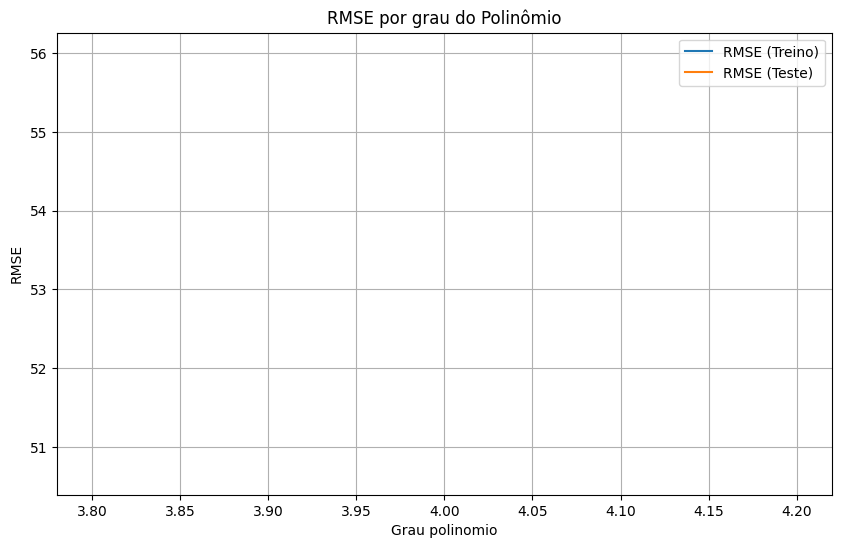

In [30]:
plt.figure(figsize=(10,6))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (Teste)')
plt.xlabel("Grau polinomio")
plt.ylabel("RMSE")
plt.title("RMSE por grau do Polinômio")
plt.legend()
plt.grid(True)
plt.show()

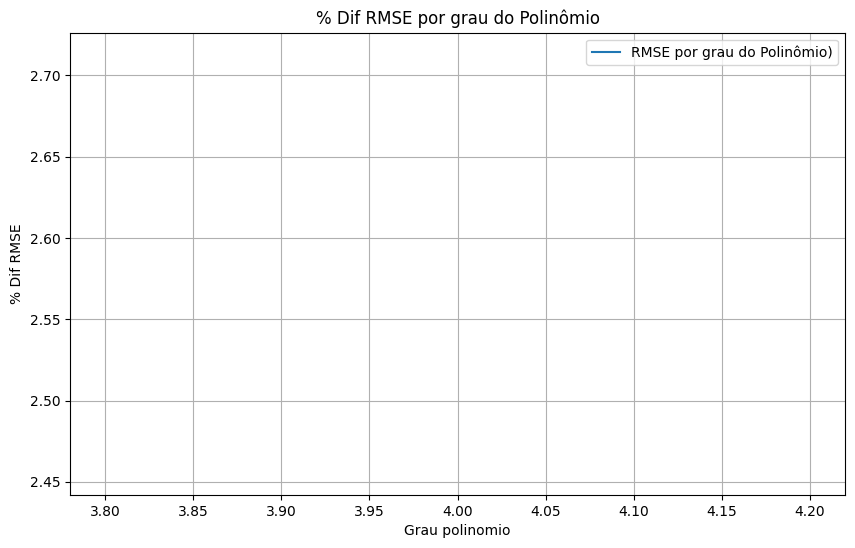

In [31]:
# Plotar Gráfico para comprar %Dif RMSE (Treino e Teste)
plt.figure(figsize=(10, 6))
plt.plot(graus_polynomial, percentual_rmse_values,
         label='RMSE por grau do Polinômio)')
plt.xlabel("Grau polinomio")
plt.ylabel("% Dif RMSE")
plt.title("% Dif RMSE por grau do Polinômio")
plt.legend()
plt.grid(True)
plt.show()

### 5. Validação do Modelo - Regressão Polinomial



#### Análise de Métricas - Modelo Polinomial



Nesta aula, analisamos as métricas do nosso modelo polinomial de grau 4 em comparação com o modelo linear. Observamos que o modelo polinomial apresentou uma melhora significativa no RMSE, reduzindo o erro em cerca de 10% em relação ao menor valor de salário na base de dados. Além disso, o R-score aumentou para 0.9998, indicando um bom ajuste do modelo. Essas métricas mostram que o modelo polinomial é uma escolha melhor do que o modelo linear. No próximo vídeo, iremos analisar os resíduos.

In [32]:
# Métricas
print(f'RMSE Treino: R${rmse_train_final:.2f}')
print(f'RMSE Teste: R${rmse_test_final:.2f}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final:.4f}%')
print(f'R2Score Teste: {r2score_test_final:.4f}%')

RMSE Treino: R$53.33
RMSE Teste: R$54.71
% Dif. RMSE Treino e Teste: 2.5842%
R2Score Teste: 0.9999%


#### Análise de Resíduos - Modelo Polinomial



Nesta aula, analisamos os resíduos do modelo polinomial e comparamos com a regressão linear. Observamos que o modelo polinomial apresentou melhorias significativas em termos de linearidade e homoscedasticidade. Também realizamos o teste de distribuição normal nos resíduos e constatamos que eles seguem uma distribuição normal, ao contrário do modelo de regressão linear. Utilizamos diferentes testes, como Shapiro-Wilk e Kolmogorov-Smirnov, e concluímos que os resíduos do modelo polinomial se ajustam melhor aos dados. Ao final da aula, resumimos que o modelo polinomial, com suas features polinomiais, apresentou métricas e análise de resíduos superiores ao modelo linear. Nos próximos vídeos, abordaremos previsões individuais, salvamento do modelo e deployment usando uma aplicação e uma API.



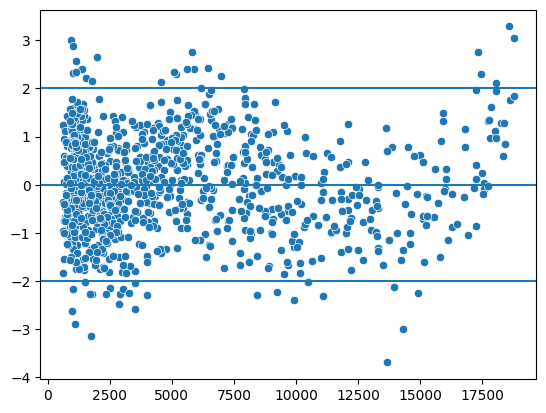

In [33]:
residuos_std = zscore(residuos)
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

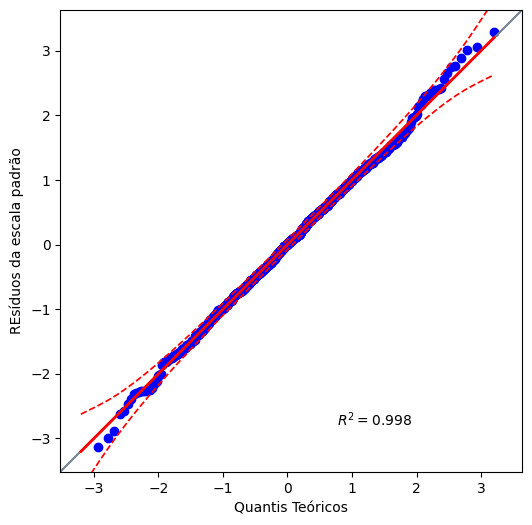

In [34]:
plt.figure(figsize=(12, 6))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("REsíduos da escala padrão")
plt.show()

In [35]:
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f'Estat: teste = {stat_shapiro:.4f} e P-Value = {p_value_shapiro}')

Estat: teste = 0.9987 e P-Value = 0.6850231289863586


In [36]:
# Teste de normalidade
stats_ks, p_value_ks = kstest(residuos, "norm")
print(f"Estat: Teste = {stats_ks:.4f} e P-Value = {p_value_ks}")

Estat: Teste = 0.4824 e P-Value = 1.2202460106524514e-214


In [37]:
# Teste de Normalidade _ Lillefors
stat_ll, p_value_ll = lilliefors(residuos, dist="norm", pvalmethod="table")
print(f"Estat: Teste = {stat_ll:.4f} e P-Value = {p_value_ll}")

Estat: Teste = 0.0136 e P-Value = 0.9566270022044506


### 6. Realizar Predição



#### Realizar Predição Individual e Salvar Modelo



Nesta aula, discutimos a importância do tempo de serviço e do nível da empresa na determinação do salário. Fizemos algumas análises gráficas e observamos que o tempo de serviço é a variável mais importante. Em seguida, salvamos o modelo que criamos para poder utilizá-lo posteriormente. Agora, vamos nos preparar para fazer o deploy do modelo e entregá-lo aos usuários. Antes disso, realizamos uma predição individual usando o modelo que acabamos de criar. Consideramos uma pessoa com 6 anos de serviço e nível máximo na empresa, e a previsão foi de um salário de R$ 4880,31.



In [43]:
input_features = {
    'tempo_na_empresa': 70,
    'nivel_na_empresa': 6,  
}


pred_df = pd.DataFrame(input_features, index=[1])

#predicao
model_poly.predict(pred_df)

array([4373.23451592])

In [44]:
# salvar modelo
joblib.dump(model_poly, "../data/model_pr.plk")

['../data/model_pr.plk']